In [151]:
import csv
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import json
import tweepy
import html
from nltk.tokenize import word_tokenize
import re
from nltk.util import bigrams, trigrams
import os
import textblob
import urllib
import string
import argparse
from urllib.parse import urlparse
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [152]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [154]:
#variables that contain the user credentials to access twitter API
consumer_key = "NUBJ7Qp8ozEMl7Z6wJUketncs" 
consumer_secret = "iI5NXsDXTEZkFrEQ0JBqsntW0lKPMfuKCtjV8Oj9GVKw3AjScv"
access_key = "1412787131353870342-A6GX0nHJCqiiVSvEgiqNZaylKoq6AQ"
access_secret = "XRF65vDfj8hReNLrKtpELdGS9mrKDIQJWZLcrfh7hu4BZ"

In [155]:
# Twitter authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)   
auth.set_access_token(access_key, access_secret) 
  
# Creating an API object 
#api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [156]:
key_words = "The Song of Achilles  -filter:retweets"

In [157]:
search_result = tweepy.Cursor(api.search, q=key_words, lang="", since="2021-01-01", truncated=True).items(1000)

In [158]:
search_result

In [159]:
crawling_result = [api.get_status(data.id, tweet_mode="extended") for data in search_result]

Rate limit reached. Sleeping for: 585


In [160]:
for i in crawling_result :
    print(dir(i))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', 

In [161]:
tweet_list = [[status.full_text] for status in crawling_result]

In [162]:
import pandas as pd
tweets = pd.DataFrame(data = tweet_list, columns=["tweet"])

In [309]:
tweets

,tweet
0,The Song of Achilles killed me omg 😫😫
1,@undcrsea The song of achilles
2,"‼️THE SONG OF ACHILLES SPOILERS‼️\n\nim sorry but i cant handle cheating at all, it truly breaks my heart. i understand the situation achilles was in but fuck im so heartbroken for patroclus. how could achilles trust his mother and really think shed keep her word"
3,"i could recognize him by touch alone, by smell; i would know him blind, by the way his breaths came and his feet struck the earth. i would know him in death, at the end of the world. — the song of achilles"
4,CH TWELVE OF THE SONG OF ACHILLES HURTS ME IM HEARTBROKEN
...,...
995,i'm reading the song of achilles and the name ajax appeared... i miss Him
996,"@girlfleurs i'm currently reading they both die at the end, carrie and song of achilles"
997,"@runmand 'nightwood' da Djuna Barnes \na tradução de sappho pela Anne Carson: 'if not, winter' \n'song of achilles' da Madeline Miller \n'giovanni's room' do Baldwin \n'and playing the role of herself' da K.E. Lane"
998,okay i've read the song of achilles- and im bawling


In [166]:
tweets.to_csv(r'tweeters.csv', index=False)

In [167]:
pd.set_option('display.max_colwidth', None)

In [189]:
tweetdata = pd.read_csv('tweeters.csv')
tweetdata

,tweet
0,The Song of Achilles killed me omg 😫😫
1,@undcrsea The song of achilles
2,"‼️THE SONG OF ACHILLES SPOILERS‼️\n\nim sorry but i cant handle cheating at all, it truly breaks my heart. i understand the situation achilles was in but fuck im so heartbroken for patroclus. how could achilles trust his mother and really think shed keep her word"
3,"i could recognize him by touch alone, by smell; i would know him blind, by the way his breaths came and his feet struck the earth. i would know him in death, at the end of the world. — the song of achilles"
4,CH TWELVE OF THE SONG OF ACHILLES HURTS ME IM HEARTBROKEN
...,...
995,i'm reading the song of achilles and the name ajax appeared... i miss Him
996,"@girlfleurs i'm currently reading they both die at the end, carrie and song of achilles"
997,"@runmand 'nightwood' da Djuna Barnes \na tradução de sappho pela Anne Carson: 'if not, winter' \n'song of achilles' da Madeline Miller \n'giovanni's room' do Baldwin \n'and playing the role of herself' da K.E. Lane"
998,okay i've read the song of achilles- and im bawling


In [190]:
#for i in range (len(tweets)):
#tweets[i] = re.sub(r”(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+”, “”, tweets[i])
#tweets.head()
def remove_punct(text):
    #text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub("(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+","", text)
    return text

tweetdata['nohtml_tweet'] = tweetdata['tweet'].apply(lambda x: remove_punct(x))
tweetdata.head(10)

,tweet,nohtml_tweet
0,The Song of Achilles killed me omg 😫😫,The Song of Achilles killed me omg
1,@undcrsea The song of achilles,The song of achilles
2,"‼️THE SONG OF ACHILLES SPOILERS‼️\n\nim sorry but i cant handle cheating at all, it truly breaks my heart. i understand the situation achilles was in but fuck im so heartbroken for patroclus. how could achilles trust his mother and really think shed keep her word",THE SONG OF ACHILLES SPOILERS\n\nim sorry but i cant handle cheating at all it truly breaks my heart i understand the situation achilles was in but fuck im so heartbroken for patroclus how could achilles trust his mother and really think shed keep her word
3,"i could recognize him by touch alone, by smell; i would know him blind, by the way his breaths came and his feet struck the earth. i would know him in death, at the end of the world. — the song of achilles",i could recognize him by touch alone by smell i would know him blind by the way his breaths came and his feet struck the earth i would know him in death at the end of the world the song of achilles
4,CH TWELVE OF THE SONG OF ACHILLES HURTS ME IM HEARTBROKEN,CH TWELVE OF THE SONG OF ACHILLES HURTS ME IM HEARTBROKEN
5,i’m bored any thoughts on “the song of achilles” ? i wanna read it,im bored any thoughts on the song of achilles i wanna read it
6,the song of achilles baunya kurang satisfying 😀,the song of achilles baunya kurang satisfying
7,@notsoaidil Song of the Achilles,Song of the Achilles
8,the song of achilles is the best book ive ever read,the song of achilles is the best book ive ever read
9,"planning to read the song of achilles and watch banana fish, does that mean i have a death wish",planning to read the song of achilles and watch banana fish does that mean i have a death wish


In [275]:
tweetdata['tweet']=tweetdata['tweet'].apply(str)

In [303]:
def remove_punct(text):
    #text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub("(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+","", text)
    return text

tweetdata['nohtml_tweet'] = tweetdata['tweet'].apply(lambda x: remove_punct(x))
tweetdata.head(10)

,tweet,nohtml_tweet,tokentweet,tweettoken,Tweet_nonstop,tweetnonstop
0,The Song of Achilles killed me omg 😫😫,The Song of Achilles killed me omg,"[the, song, of, achilles, killed, me, omg, ]","[the, song, of, achilles, killed, me, omg, ]","[song, achilles, killed, omg, ]","[song, achilles, killed, omg, ]"
1,@undcrsea The song of achilles,The song of achilles,"[, the, song, of, achilles]","[, the, song, of, achilles]","[, song, achilles]","[, song, achilles]"
2,"‼️THE SONG OF ACHILLES SPOILERS‼️\n\nim sorry but i cant handle cheating at all, it truly breaks my heart. i understand the situation achilles was in but fuck im so heartbroken for patroclus. how could achilles trust his mother and really think shed keep her word",THE SONG OF ACHILLES SPOILERS\n\nim sorry but i cant handle cheating at all it truly breaks my heart i understand the situation achilles was in but fuck im so heartbroken for patroclus how could achilles trust his mother and really think shed keep her word,"[the, song, of, achilles, spoilers, im, sorry, but, i, cant, handle, cheating, at, all, it, truly, breaks, my, heart, i, understand, the, situation, achilles, was, in, but, fuck, im, so, heartbroken, for, patroclus, how, could, achilles, trust, his, mother, and, really, think, shed, keep, her, word]","[the, song, of, achilles, spoilers, im, sorry, but, i, cant, handle, cheating, at, all, it, truly, breaks, my, heart, i, understand, the, situation, achilles, was, in, but, fuck, im, so, heartbroken, for, patroclus, how, could, achilles, trust, his, mother, and, really, think, shed, keep, her, word]","[song, achilles, spoilers, im, sorry, cant, handle, cheating, truly, breaks, heart, understand, situation, achilles, fuck, im, heartbroken, patroclus, could, achilles, trust, mother, really, think, shed, keep, word]","[song, achilles, spoilers, im, sorry, cant, handle, cheating, truly, breaks, heart, understand, situation, achilles, fuck, im, heartbroken, patroclus, could, achilles, trust, mother, really, think, shed, keep, word]"
3,"i could recognize him by touch alone, by smell; i would know him blind, by the way his breaths came and his feet struck the earth. i would know him in death, at the end of the world. — the song of achilles",i could recognize him by touch alone by smell i would know him blind by the way his breaths came and his feet struck the earth i would know him in death at the end of the world the song of achilles,"[i, could, recognize, him, by, touch, alone, by, smell, i, would, know, him, blind, by, the, way, his, breaths, came, and, his, feet, struck, the, earth, i, would, know, him, in, death, at, the, end, of, the, world, the, song, of, achilles]","[i, could, recognize, him, by, touch, alone, by, smell, i, would, know, him, blind, by, the, way, his, breaths, came, and, his, feet, struck, the, earth, i, would, know, him, in, death, at, the, end, of, the, world, the, song, of, achilles]","[could, recognize, touch, alone, smell, would, know, blind, way, breaths, came, feet, struck, earth, would, know, death, end, world, song, achilles]","[could, recognize, touch, alone, smell, would, know, blind, way, breaths, came, feet, struck, earth, would, know, death, end, world, song, achilles]"
4,CH TWELVE OF THE SONG OF ACHILLES HURTS ME IM HEARTBROKEN,CH TWELVE OF THE SONG OF ACHILLES HURTS ME IM HEARTBROKEN,"[ch, twelve, of, the, song, of, achilles, hurts, me, im, heartbroken]","[ch, twelve, of, the, song, of, achilles, hurts, me, im, heartbroken]","[ch, twelve, song, achilles, hurts, im, heartbroken]","[ch, twelve, song, achilles, hurts, im, heartbroken]"
5,i’m bored any thoughts on “the song of achilles” ? i wanna read it,im bored any thoughts on the song of achilles i wanna read it,"[im, bored, any, thoughts, on, the, song, of, achilles, i, wanna, read, it]","[im, bored, any, thoughts, on, the, song, of, achilles, i, wanna, read, it]","[im, bored, thoughts, song, achilles, wanna, read]","[im, bored, thoughts, song, achilles, wanna, read]"
6,the song

In [255]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweetdata['tweettoken'] = tweetdata['nohtml_tweet'].apply(lambda x: tokenization(x.lower()))
tweetdata.head()

,tweet,nohtml_tweet,tokentweet,tweettoken
0,The Song of Achilles killed me omg 😫😫,The Song of Achilles killed me omg,"[the, song, of, achilles, killed, me, omg, ]","[the, song, of, achilles, killed, me, omg, ]"
1,@undcrsea The song of achilles,The song of achilles,"[, the, song, of, achilles]","[, the, song, of, achilles]"
2,"‼️THE SONG OF ACHILLES SPOILERS‼️\n\nim sorry but i cant handle cheating at all, it truly breaks my heart. i understand the situation achilles was in but fuck im so heartbroken for patroclus. how could achilles trust his mother and really think shed keep her word",THE SONG OF ACHILLES SPOILERS\n\nim sorry but i cant handle cheating at all it truly breaks my heart i understand the situation achilles was in but fuck im so heartbroken for patroclus how could achilles trust his mother and really think shed keep her word,"[the, song, of, achilles, spoilers, im, sorry, but, i, cant, handle, cheating, at, all, it, truly, breaks, my, heart, i, understand, the, situation, achilles, was, in, but, fuck, im, so, heartbroken, for, patroclus, how, could, achilles, trust, his, mother, and, really, think, shed, keep, her, word]","[the, song, of, achilles, spoilers, im, sorry, but, i, cant, handle, cheating, at, all, it, truly, breaks, my, heart, i, understand, the, situation, achilles, was, in, but, fuck, im, so, heartbroken, for, patroclus, how, could, achilles, trust, his, mother, and, really, think, shed, keep, her, word]"
3,"i could recognize him by touch alone, by smell; i would know him blind, by the way his breaths came and his feet struck the earth. i would know him in death, at the end of the world. — the song of achilles",i could recognize him by touch alone by smell i would know him blind by the way his breaths came and his feet struck the earth i would know him in death at the end of the world the song of achilles,"[i, could, recognize, him, by, touch, alone, by, smell, i, would, know, him, blind, by, the, way, his, breaths, came, and, his, feet, struck, the, earth, i, would, know, him, in, death, at, the, end, of, the, world, the, song, of, achilles]","[i, could, recognize, him, by, touch, alone, by, smell, i, would, know, him, blind, by, the, way, his, breaths, came, and, his, feet, struck, the, earth, i, would, know, him, in, death, at, the, end, of, the, world, the, song, of, achilles]"
4,CH TWELVE OF THE SONG OF ACHILLES HURTS ME IM HEARTBROKEN,CH TWELVE OF THE SONG OF ACHILLES HURTS ME IM HEARTBROKEN,"[ch, twelve, of, the, song, of, achilles, hurts, me, im, heartbroken]","[ch, twelve, of, the, song, of, achilles, hurts, me, im, heartbroken]"


In [305]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tweetdata['tweetnonstop'] = tweetdata['tweettoken'].apply(lambda x: remove_stopwords(x))
tweetdata.head(10)

,tweet,nohtml_tweet,tokentweet,tweettoken,Tweet_nonstop,tweetnonstop
0,The Song of Achilles killed me omg 😫😫,The Song of Achilles killed me omg,"[the, song, of, achilles, killed, me, omg, ]","[the, song, of, achilles, killed, me, omg, ]","[song, achilles, killed, omg, ]","[song, achilles, killed, omg, ]"
1,@undcrsea The song of achilles,The song of achilles,"[, the, song, of, achilles]","[, the, song, of, achilles]","[, song, achilles]","[, song, achilles]"
2,"‼️THE SONG OF ACHILLES SPOILERS‼️\n\nim sorry but i cant handle cheating at all, it truly breaks my heart. i understand the situation achilles was in but fuck im so heartbroken for patroclus. how could achilles trust his mother and really think shed keep her word",THE SONG OF ACHILLES SPOILERS\n\nim sorry but i cant handle cheating at all it truly breaks my heart i understand the situation achilles was in but fuck im so heartbroken for patroclus how could achilles trust his mother and really think shed keep her word,"[the, song, of, achilles, spoilers, im, sorry, but, i, cant, handle, cheating, at, all, it, truly, breaks, my, heart, i, understand, the, situation, achilles, was, in, but, fuck, im, so, heartbroken, for, patroclus, how, could, achilles, trust, his, mother, and, really, think, shed, keep, her, word]","[the, song, of, achilles, spoilers, im, sorry, but, i, cant, handle, cheating, at, all, it, truly, breaks, my, heart, i, understand, the, situation, achilles, was, in, but, fuck, im, so, heartbroken, for, patroclus, how, could, achilles, trust, his, mother, and, really, think, shed, keep, her, word]","[song, achilles, spoilers, im, sorry, cant, handle, cheating, truly, breaks, heart, understand, situation, achilles, fuck, im, heartbroken, patroclus, could, achilles, trust, mother, really, think, shed, keep, word]","[song, achilles, spoilers, im, sorry, cant, handle, cheating, truly, breaks, heart, understand, situation, achilles, fuck, im, heartbroken, patroclus, could, achilles, trust, mother, really, think, shed, keep, word]"
3,"i could recognize him by touch alone, by smell; i would know him blind, by the way his breaths came and his feet struck the earth. i would know him in death, at the end of the world. — the song of achilles",i could recognize him by touch alone by smell i would know him blind by the way his breaths came and his feet struck the earth i would know him in death at the end of the world the song of achilles,"[i, could, recognize, him, by, touch, alone, by, smell, i, would, know, him, blind, by, the, way, his, breaths, came, and, his, feet, struck, the, earth, i, would, know, him, in, death, at, the, end, of, the, world, the, song, of, achilles]","[i, could, recognize, him, by, touch, alone, by, smell, i, would, know, him, blind, by, the, way, his, breaths, came, and, his, feet, struck, the, earth, i, would, know, him, in, death, at, the, end, of, the, world, the, song, of, achilles]","[could, recognize, touch, alone, smell, would, know, blind, way, breaths, came, feet, struck, earth, would, know, death, end, world, song, achilles]","[could, recognize, touch, alone, smell, would, know, blind, way, breaths, came, feet, struck, earth, would, know, death, end, world, song, achilles]"
4,CH TWELVE OF THE SONG OF ACHILLES HURTS ME IM HEARTBROKEN,CH TWELVE OF THE SONG OF ACHILLES HURTS ME IM HEARTBROKEN,"[ch, twelve, of, the, song, of, achilles, hurts, me, im, heartbroken]","[ch, twelve, of, the, song, of, achilles, hurts, me, im, heartbroken]","[ch, twelve, song, achilles, hurts, im, heartbroken]","[ch, twelve, song, achilles, hurts, im, heartbroken]"
5,i’m bored any thoughts on “the song of achilles” ? i wanna read it,im bored any thoughts on the song of achilles i wanna read it,"[im, bored, any, thoughts, on, the, song, of, achilles, i, wanna, read, it]","[im, bored, any, thoughts, on, the, song, of, achilles, i, wanna, read, it]","[im, bored, thoughts, song, achilles, wanna, read]","[im, bored, thoughts, song, achilles, wanna, read]"
6,the song

In [312]:
Tweet_Texts=tweetdata['tweetnonstop'].values

In [313]:
Tweet_Texts

array([list(['song', 'achilles', 'killed', 'omg', '']),
       list(['', 'song', 'achilles']),
       list(['song', 'achilles', 'spoilers', 'im', 'sorry', 'cant', 'handle', 'cheating', 'truly', 'breaks', 'heart', 'understand', 'situation', 'achilles', 'fuck', 'im', 'heartbroken', 'patroclus', 'could', 'achilles', 'trust', 'mother', 'really', 'think', 'shed', 'keep', 'word']),
       list(['could', 'recognize', 'touch', 'alone', 'smell', 'would', 'know', 'blind', 'way', 'breaths', 'came', 'feet', 'struck', 'earth', 'would', 'know', 'death', 'end', 'world', 'song', 'achilles']),
       list(['ch', 'twelve', 'song', 'achilles', 'hurts', 'im', 'heartbroken']),
       list(['im', 'bored', 'thoughts', 'song', 'achilles', 'wanna', 'read']),
       list(['song', 'achilles', 'baunya', 'kurang', 'satisfying', '']),
       list(['', 'song', 'achilles']),
       list(['song', 'achilles', 'best', 'book', 'ive', 'ever', 'read']),
       list(['planning', 'read', 'song', 'achilles', 'watch', 'banana'

In [314]:
Tweets_String=str(Tweet_Texts)

In [315]:
Tweets_String

"[list(['song', 'achilles', 'killed', 'omg', ''])\n list(['', 'song', 'achilles'])\n list(['song', 'achilles', 'spoilers', 'im', 'sorry', 'cant', 'handle', 'cheating', 'truly', 'breaks', 'heart', 'understand', 'situation', 'achilles', 'fuck', 'im', 'heartbroken', 'patroclus', 'could', 'achilles', 'trust', 'mother', 'really', 'think', 'shed', 'keep', 'word'])\n list(['could', 'recognize', 'touch', 'alone', 'smell', 'would', 'know', 'blind', 'way', 'breaths', 'came', 'feet', 'struck', 'earth', 'would', 'know', 'death', 'end', 'world', 'song', 'achilles'])\n list(['ch', 'twelve', 'song', 'achilles', 'hurts', 'im', 'heartbroken'])\n list(['im', 'bored', 'thoughts', 'song', 'achilles', 'wanna', 'read'])\n list(['song', 'achilles', 'baunya', 'kurang', 'satisfying', ''])\n list(['', 'song', 'achilles'])\n list(['song', 'achilles', 'best', 'book', 'ive', 'ever', 'read'])\n list(['planning', 'read', 'song', 'achilles', 'watch', 'banana', 'fish', 'mean', 'death', 'wish'])\n list(['moots', 'read'

In [321]:
# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

In [322]:
# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

In [323]:
# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)

In [324]:
# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)

In [325]:
# Deleting any word which is less than 3-characters mostly those are stopwords
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', Tweet_Texts_Cleaned)

In [326]:
# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

In [327]:
Tweet_Texts_Cleaned

' list song achilles killed omg list song achilles list song achilles spoilers sorry cant handle cheating truly breaks heart understand situation achilles fuck heartbroken patroclus could achilles trust mother really think shed keep word list could recognize touch alone smell would know blind way breaths came feet struck earth would know death end world song achilles list twelve song achilles hurts heartbroken list bored thoughts song achilles wanna read list song achilles baunya kurang satisfying list song achilles list song achilles best book ive ever read list planning read song achilles watch banana fish mean death wish list moots read song achilles list already read books july nothing comes closing good song achilles sense another reading slump coming list finished song achilles putangina need collet list song achilles list reaches song achilles amp ill wreck end amp ready end list want movie song achilles chalamet patroclus list termine leer song achilles decidido que nunca volve

In [290]:
#tweetdata.to_csv(r'final.csv', index = False)
#Final = pd.read_csv('final.csv')
#tweetme = Final['tweetnonstop']
#tweetme.head()

0                                                                                                                                                                                                                                        ['song', 'achilles', 'killed', 'omg', '']
1                                                                                                                                                                                                                                                         ['', 'song', 'achilles']
2    ['song', 'achilles', 'spoilers', 'im', 'sorry', 'cant', 'handle', 'cheating', 'truly', 'breaks', 'heart', 'understand', 'situation', 'achilles', 'fuck', 'im', 'heartbroken', 'patroclus', 'could', 'achilles', 'trust', 'mother', 'really', 'think', 'shed', 'keep', 'word']
3                                                                                   ['could', 'recognize', 'touch', 'alone', 'smell', 'would', 'know', 'blind', 'way', 'breaths

In [306]:
tweets_to_token = tweetstop
sw = nltk.corpus.stopwords.words('english') #you can adjust the language as you desire
sw.remove('not') #we exclude not from the stopwords corpus since removing not from the text will change the context of the text

In [328]:
string = pd.Series(Tweet_Texts_Cleaned).str.cat(sep=' ')

In [329]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
#stopwords.update(["elonmusk","elon musk","elon","musk","spacex"]) #adding our own stopwords

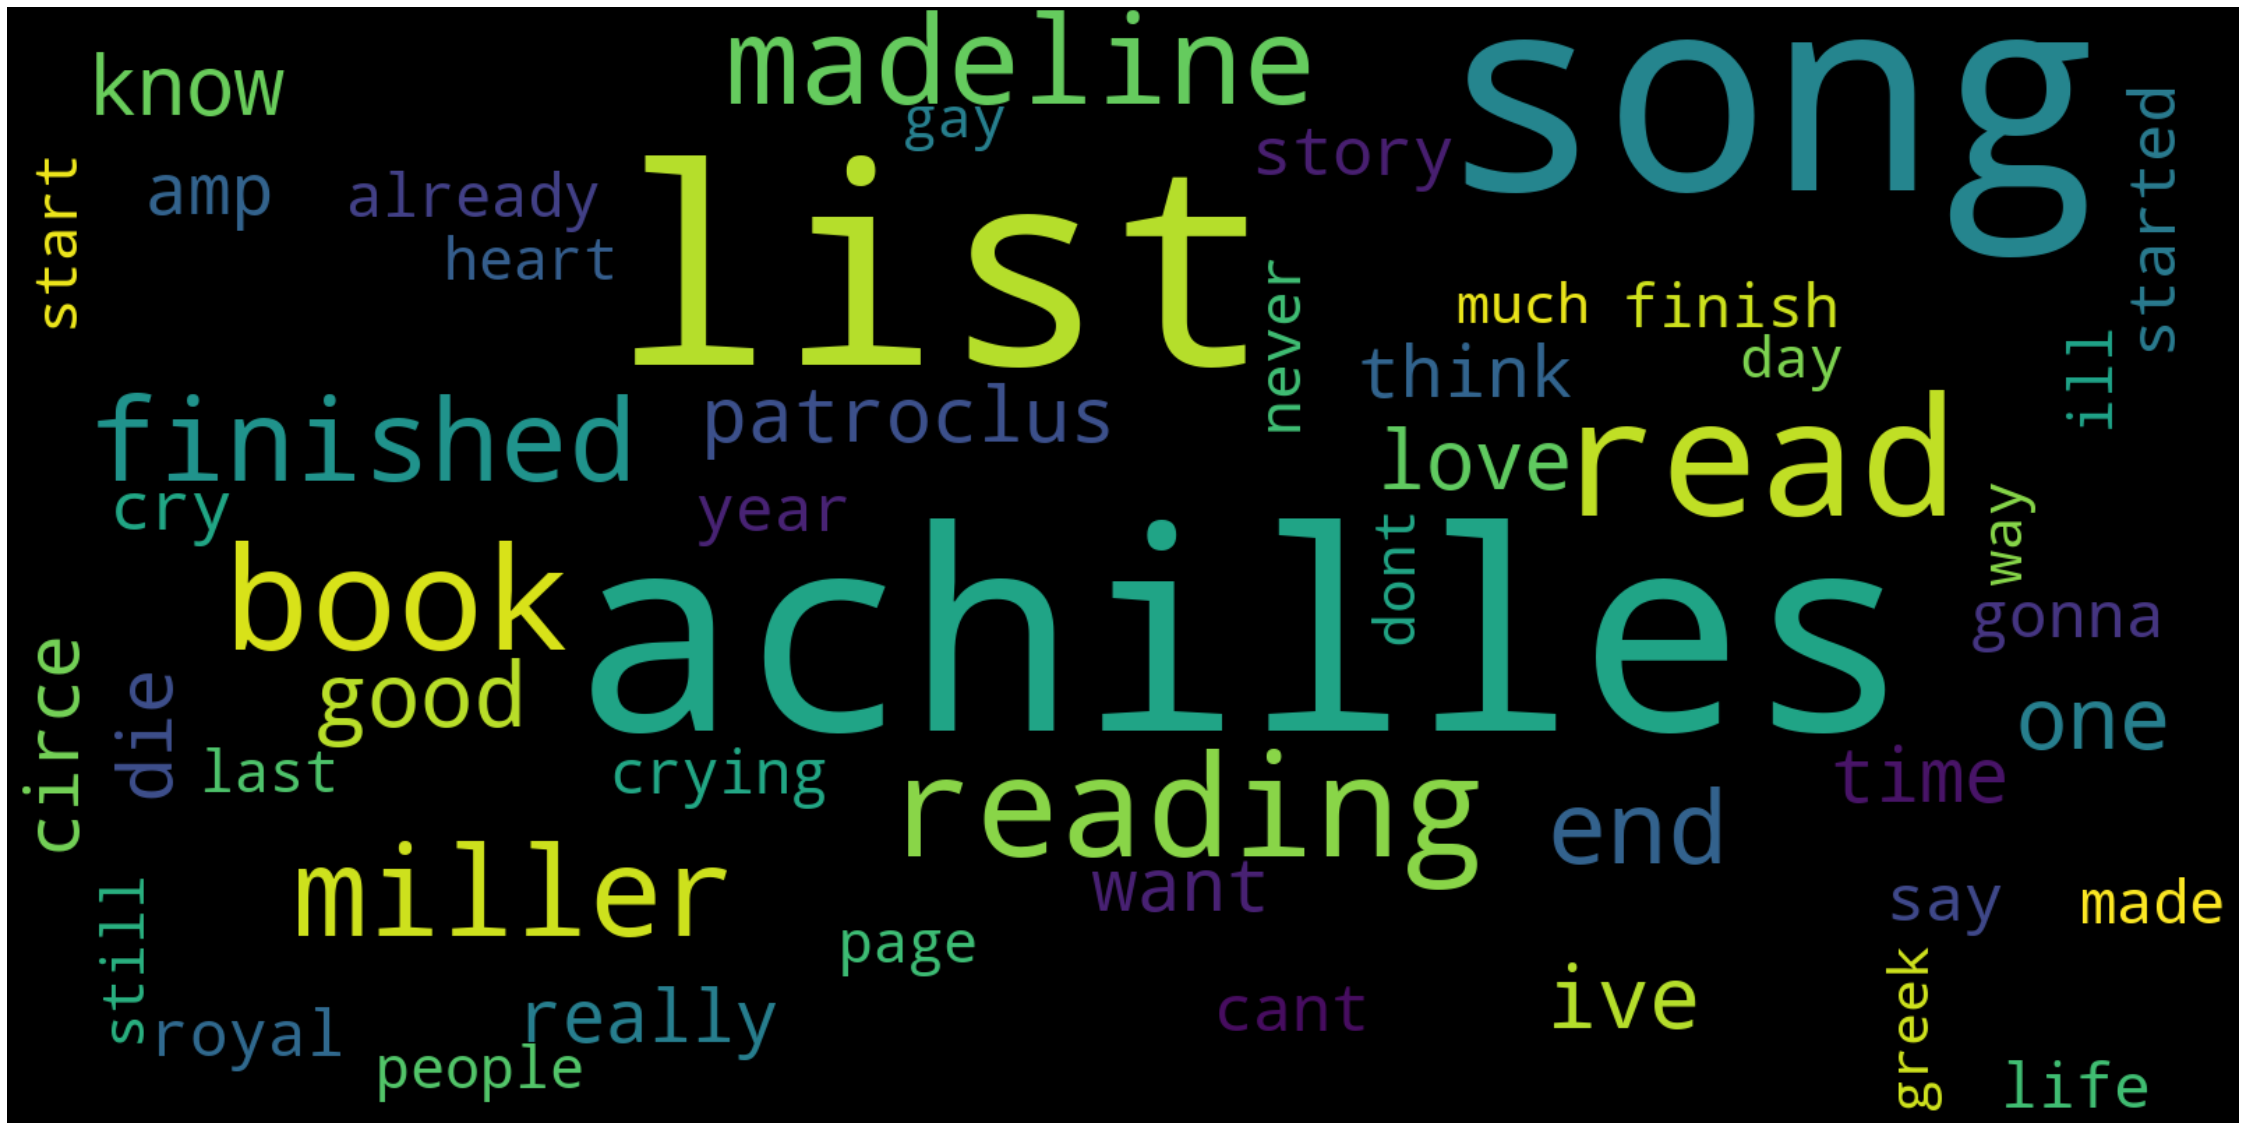

In [330]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [334]:
Tweet_Texts_Cleaned

' list song achilles killed omg list song achilles list song achilles spoilers sorry cant handle cheating truly breaks heart understand situation achilles fuck heartbroken patroclus could achilles trust mother really think shed keep word list could recognize touch alone smell would know blind way breaths came feet struck earth would know death end world song achilles list twelve song achilles hurts heartbroken list bored thoughts song achilles wanna read list song achilles baunya kurang satisfying list song achilles list song achilles best book ive ever read list planning read song achilles watch banana fish mean death wish list moots read song achilles list already read books july nothing comes closing good song achilles sense another reading slump coming list finished song achilles putangina need collet list song achilles list reaches song achilles amp ill wreck end amp ready end list want movie song achilles chalamet patroclus list termine leer song achilles decidido que nunca volve

In [ ]:
df['bigrams'] = df['tweets'].apply(lambda row: list(nltk.bigrams(row.split(' '))))
print(df['bigrams'].head())

In [147]:
from nltk import bigrams
terms_bigram = [list(bigrams(tweetnonstop)) for tweetnonstop in tweets_to_token]
# View bigrams for the first tweet
terms_bigram[1]

[('u', ' '),
 (' ', 'r'),
 ('r', 'e'),
 ('e', 'a'),
 ('a', 'd'),
 ('d', ' '),
 (' ', 's'),
 ('s', 'o'),
 ('o', 'n'),
 ('n', 'g'),
 ('g', ' '),
 (' ', 'a'),
 ('a', 'c'),
 ('c', 'h'),
 ('h', 'i'),
 ('i', 'l'),
 ('l', 'l'),
 ('l', 'e'),
 ('e', 's'),
 ('s', ' '),
 (' ', 's'),
 ('s', 'e'),
 ('e', 'n'),
 ('n', 's'),
 ('s', 'e'),
 ('e', ' '),
 (' ', 'u')]

In [92]:
import itertools
import collections
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('s', ' '), 1830),
 (('n', 'g'), 1736),
 ((' ', 's'), 1675),
 (('g', ' '), 1647),
 ((' ', 'a'), 1495),
 (('l', 'l'), 1470),
 (('o', 'n'), 1457),
 (('l', 'e'), 1454),
 (('e', 's'), 1447),
 (('e', ' '), 1349),
 (('i', 'l'), 1320),
 (('h', 'i'), 1263),
 (('c', 'h'), 1221),
 (('s', 'o'), 1199),
 (('a', 'c'), 1165),
 (('i', 'n'), 1149),
 (('d', ' '), 940),
 (('r', 'e'), 914),
 (('e', 'a'), 734),
 (('t', ' '), 734)]

In [93]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(s, )",1830
1,"(n, g)",1736
2,"( , s)",1675
3,"(g, )",1647
4,"( , a)",1495
5,"(l, l)",1470
6,"(o, n)",1457
7,"(l, e)",1454
8,"(e, s)",1447
9,"(e, )",1349


In [ ]:
tweets.to_csv(r'twimmer.csv', index=False)
twt = pd.read_csv('twimmer.csv')
tweter = twt['tweet']
tweter.head()

In [ ]:
#tokenized
tokentweet = [word_tokenize(tweet)for tweet in tweter]
print(tokentweet)

In [ ]:
#preprocessing phase
tweets['tweet'] = tweets['tweet'].apply(lambda x: re.sub(r'\bRT\b', '', x).strip())
tweets

In [ ]:
# Remove URLs
tweets_no_urls = [remove_url(tweet) for tweet in tweets]
tweets_no_urls

In [ ]:
#tokenized
tweets_tokenized = [word_tokenize(tweet)for tweet in tweets_no_urls]

In [ ]:
pp = pd.read_csv('you.csv', encoding='utf-8')

In [ ]:
pp

In [ ]:
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )

In [ ]:
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [ ]:
a = tweets.loc[4].to_string() #loads the row from dataframe
print(a)

In [ ]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()

In [ ]:
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [ ]:
print("Cleaning the tweets...\n")
cleaned_tweets = []
for i in range(0,1000):
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have been processed".format(i+1,1000))                                                                  
    cleaned_tweets.append(cleaning_tweets((tweets.tweet[i])))

In [ ]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["elonmusk","elon musk","elon","musk","spacex"])

In [ ]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='grey').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
cleaned_tweets

In [ ]:
string.punctuation

In [ ]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in cleaned_tweets]

# View bigrams for the first tweet
terms_bigram[0]

In [ ]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

In [ ]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df